## LDA performance on mean-intensity values of cubes of varying sizes around centroids

Mean intensity of synaptic and non-synaptic centroids were used to classify the data. Cubes of different sizes were generated to find the mean intensity of a region around the centroids. Size of a synapse is around 1 ${\mu}m^3$; we chose cubes ranging from 1 ${\mu}m^3$ to to approximately 5 ${\mu}m^3$



In [21]:
%matplotlib inline
import itertools

import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from skimage.filters import threshold_otsu
from matplotlib import pyplot as plt


In [22]:
## generating the correct matrices for LDA:

def matrix_generation(master_data):
    
    ##training set, need the 1st 120 rows and 3rd and 7th column from feature csv file
    #for mean intensity value of synapses and non-synapses
    ## choosing 35% of the data to be training set
    training_synapses = master_data[:120, 3]
    training_non_synapses = master_data[:120, 7]
    train_syn = training_synapses[:, np.newaxis]
    train_non_syn = training_non_synapses[:, np.newaxis]

    
    ##Testing set, take next 220 rows and correct columns for synapses and non-synapses
    testing_synapses= master_data[120:340,3]
    testing_non_synapses = master_data[120:340,7]
    test_syn = testing_synapses[:, np.newaxis]
    test_non_syn = testing_non_synapses[:, np.newaxis]
    
    
    ### The final training set:
    train_data = np.vstack((train_syn, train_non_syn))
    
    ### The final label generation, synapses belong to class 1, non-synpases belong to class 0:
    train_labels = np.append(np.ones((len(train_syn))), np.zeros(len(train_non_syn)))
    
    return (train_data, train_labels, test_syn, test_non_syn)
 




In [23]:
def lda_performance(master_data):
    train_data, train_labels, test_syn, test_non_syn  = matrix_generation(master_data)
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    clf = LinearDiscriminantAnalysis()
    clf.fit(train_data, train_labels)

    pred_syn = clf.predict(test_syn)
    pred_non_syn = clf.predict(test_non_syn)

    ##counting the number of wrong predictions for non_syn class:
    wrong_non_syn = pred_non_syn.sum() ##can do this because non-syn class has a label of 0

    ##counting the number of wrong predictions for syn class:

    wrong_syn = 0
    for elem in pred_syn:
        if elem ==0:
            wrong_syn +=1
    total_err_freq=(wrong_syn+wrong_non_syn)/440 ##440 testing points used

    return wrong_syn, wrong_non_syn, total_err_freq 

In [24]:
file_name = ['round1_size10.csv', 'round1_size14.csv', 'round1_size18.csv', 'round1_size20.csv', 'round1_size22.csv']

errors_list = []
for i in file_name:
    df = pd.read_csv(i)
    master_data = df.as_matrix()
    _, _, err = lda_performance(master_data)
    errors_list.append(err)
    print('Filename:', i, lda_performance(master_data))
print(errors_list)


Filename: round1_size10.csv (0, 56.0, 0.12727272727272726)
Filename: round1_size14.csv (0, 57.0, 0.12954545454545455)
Filename: round1_size18.csv (0, 52.0, 0.11818181818181818)
Filename: round1_size20.csv (0, 59.0, 0.13409090909090909)
Filename: round1_size22.csv (0, 45.0, 0.10227272727272728)
[0.12727272727272726, 0.12954545454545455, 0.11818181818181818, 0.13409090909090909, 0.10227272727272728]


[0.12727272727272726, 0.12954545454545455, 0.11818181818181818, 0.13409090909090909, 0.10227272727272728]


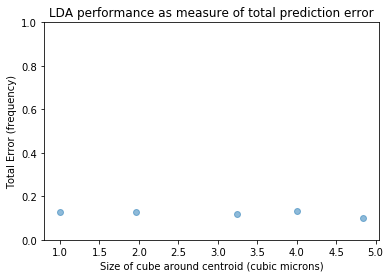

In [25]:
##Plotting the errors and the cube sizes to check their relative performance

print(errors_list)
size = [1, 1.96, 3.24, 4, 4.84] ## these are the actual sizes of the cubes, in microns cubed
plt.scatter(size, errors_list, alpha=0.5)
plt.ylabel('Total Error (frequency)')
plt.ylim([0,1])
plt.xlabel('Size of cube around centroid (cubic microns)')
plt.title('LDA performance as measure of total prediction error')
plt.autoscale(enable = False, axis='both', tight=None)
plt.show()

We know that 4.84 ${\mu}m^3$ cubes give lowest errors of the cubes computed, and non-synapses are misclassified. We use this knowledge to re-run LDA and use the misclassified centroids to generate overlay plots. 

In [19]:

def lda_performance2():
    train_data, train_labels, test_syn, test_non_syn  = matrix_generation(master_data)
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    clf = LinearDiscriminantAnalysis()
    clf.fit(train_data, train_labels)

    pred_syn = clf.predict(test_syn)
    pred_non_syn = clf.predict(test_non_syn)
    
    return(pred_non_syn)

In [20]:
### Data file for 4.84 micron^3 cube 
## interested in generating this for overlays:
df = pd.read_csv('round1_size22.csv')
master_data = df.as_matrix()
print('master_data shape:', master_data.shape)


pred_non_syn=lda_performance2()

non_syn_locations = master_data[120:340,4:7]

type(non_syn_locations[0])
z_array=[]
y_array=[]
x_array=[]
for thing in range (len(pred_non_syn)):
    if pred_non_syn[thing]==1:
        z_array.append(non_syn_locations[thing][0])
        y_array.append(non_syn_locations[thing][1])
        x_array.append(non_syn_locations[thing][2])
data={'Z':z_array,'Y':y_array,'X':x_array}
void=pd.DataFrame(data,columns=['Z','Y','X'])
void.to_csv('non_syn_errors.csv')


master_data shape: (345, 8)


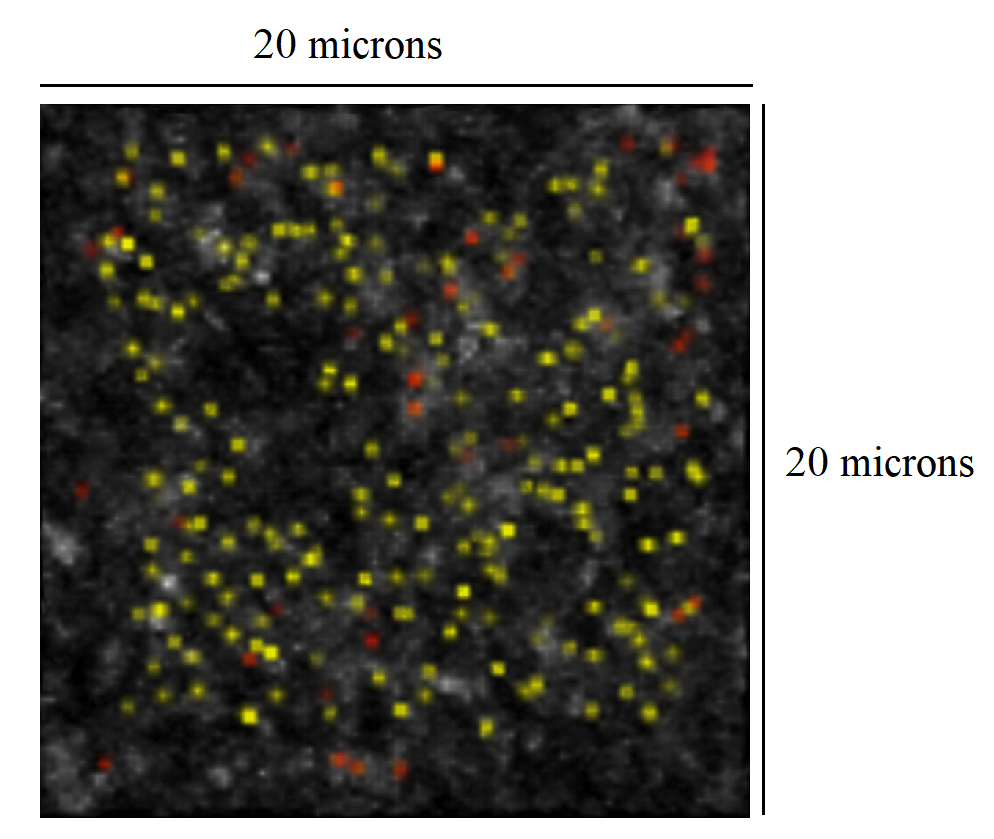

In [27]:
## Overlayed centroid predictions:
from IPython.display import Image
Image(filename='modifiedsize5.PNG')

Plot: 6400 ${\mu}m^3$ volume overlayed using the results of 4.84 ${\mu}m^3$ cubes for intensity generation. Red = mislabelled non-synapses (i.e labelled as synapses), yellow = true synapse